In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://github.com/ElijahSum/mipt_visualization/raw/master/week_04_visualization/data/house_prices.csv", index_col=0)

In [ ]:
df

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0
...,...,...,...,...,...,...,...,...
168435,Flat,7500000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
168436,House,8800000,Bahria Town Karachi,Karachi,4,For Sale,3,8.0
168438,House,14000000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
168439,House,14000000,Bahria Town Karachi,Karachi,4,For Sale,4,14.0


## Задача 1. Анализ влияния количества ванных комнат на цену недвижимости с использованием линейной регрессии и визуализация результатов


Создайте модель линейной регрессии для предсказания цены недвижимости на основе количества ванных комнат.
Визуализируйте рассеяние данных и линию регрессии на одном графике.

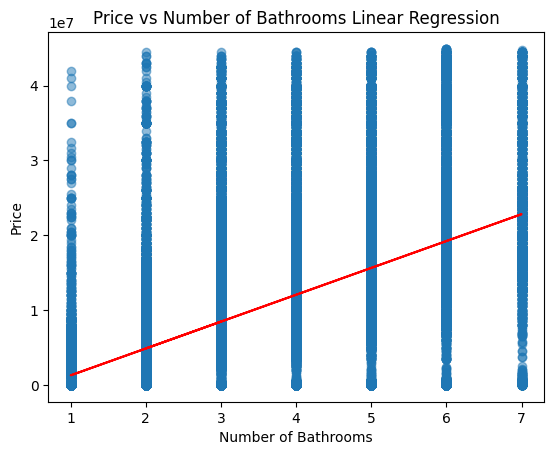

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данны
# Подготовка данных
X = df[['baths']].values
y = df['price'].values

# Создание и обучение модели
model = LinearRegression()
model.fit(X, y)

# Визуализация
plt.scatter(X, y, alpha=0.5)
plt.plot(X, model.predict(X), color='red')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.title('Price vs Number of Bathrooms Linear Regression')
plt.show()


## Задание 2. Прогнозирование целевого назначения недвижимости с использованием наивного байесовского классификатора
Создайте модель наивного байесовского классификатора для прогнозирования целевого назначения недвижимости (поле 'purpose') на основе числовых признаков.
Оцените точность модели с помощью кросс-валидации.
Визуализируйте матрицу ошибок для оценки производительности модели.

Cross-validated accuracy: 0.9965928961355347


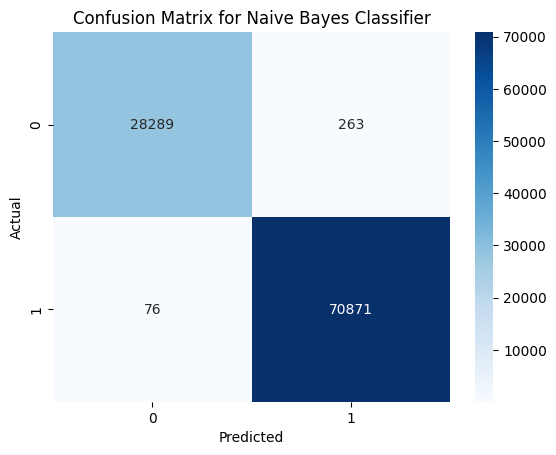

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Подготовка данных
X = df[['price', 'baths', 'bedrooms', 'Area_in_Marla']]
y = df['purpose']

# Создание и оценка модели
model = GaussianNB()
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f'Cross-validated accuracy: {scores.mean()}')

# Визуализация матрицы ошибок
y_pred = cross_val_predict(model, X, y, cv=5)
conf_mat = confusion_matrix(y, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()


## Задание 3. Определение оптимального количества кластеров для K-Means с использованием метода локтя

Используйте метод локтя для определения оптимального количества кластеров для алгоритма K-Means, примененного к признакам 'price' и 'Area_in_Marla'.
Визуализируйте результаты, чтобы показать, как изменяется сумма квадратов расстояний внутри кластеров в зависимости от количества кластеров.

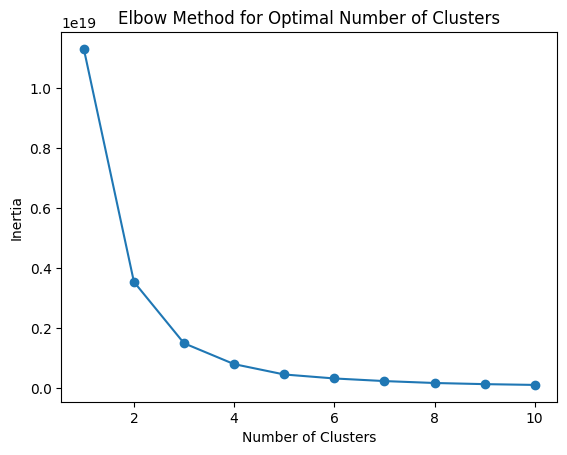

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# Подготовка данных
X = df[['price', 'Area_in_Marla']]

# Определение оптимального количества кластеров
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


## Задание 4. Обнаружение аномалий в ценах на недвижимость с использованием Isolation Forest
Примените алгоритм Isolation Forest для обнаружения аномально высоких или низких цен на недвижимость.
Визуализируйте результаты, отметив аномалии на диаграмме рассеяния цен и площади недвижимости.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


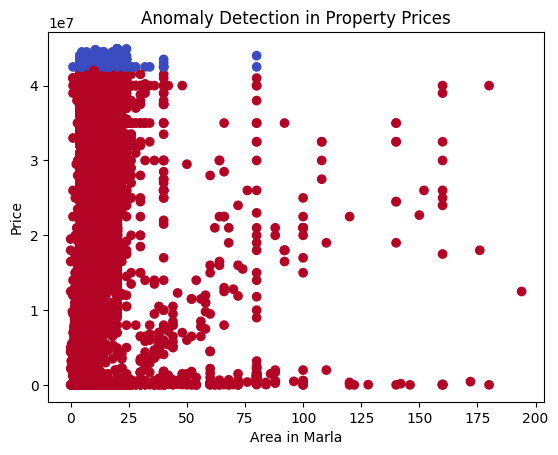

In [ ]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import matplotlib.pyplot as plt

# Обучение модели Isolation Forest
model = IsolationForest(contamination=0.01)
df['anomaly'] = model.fit_predict(df[['price']])

# Визуализация аномалий
plt.scatter(df['Area_in_Marla'], df['price'], c=df['anomaly'], cmap='coolwarm')
plt.xlabel('Area in Marla')
plt.ylabel('Price')
plt.title('Anomaly Detection in Property Prices')
plt.show()


## Задание 5. Применение алгоритма Local Outlier Factor для выявления необычных объектов недвижимости
Используйте алгоритм Local Outlier Factor (LOF) для обнаружения объектов недвижимости с необычными характеристиками (например, слишком большой площадью при низкой цене).
Визуализируйте результаты на диаграмме рассеяния, где цвет точек отражает степень аномальности.

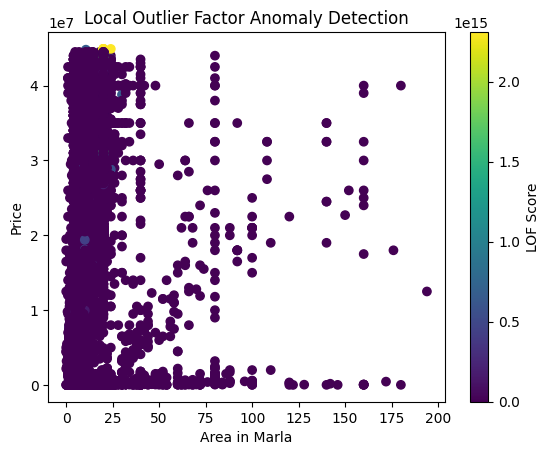

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd
import matplotlib.pyplot as plt

# Обучение модели LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
df['lof_score'] = lof.fit_predict(df[['price', 'Area_in_Marla']])
df['lof_score'] = -lof.negative_outlier_factor_  # Чем меньше, тем более аномальный

# Визуализация аномалий
plt.scatter(df['Area_in_Marla'], df['price'], c=df['lof_score'], cmap='viridis')
plt.colorbar(label='LOF Score')
plt.xlabel('Area in Marla')
plt.ylabel('Price')
plt.title('Local Outlier Factor Anomaly Detection')
plt.show()


## Задание 6. Анализ аномалий в количестве ванных комнат с использованием Gaussian Mixture Model (GMM)

Используйте GMM для моделирования распределения количества ванных комнат в зависимости от площади недвижимости.
Определите аномальные объекты на основе вероятностей принадлежности к компонентам смеси.
Визуализируйте результаты на диаграмме рассеяния, где цвет точек отражает степень аномальности.

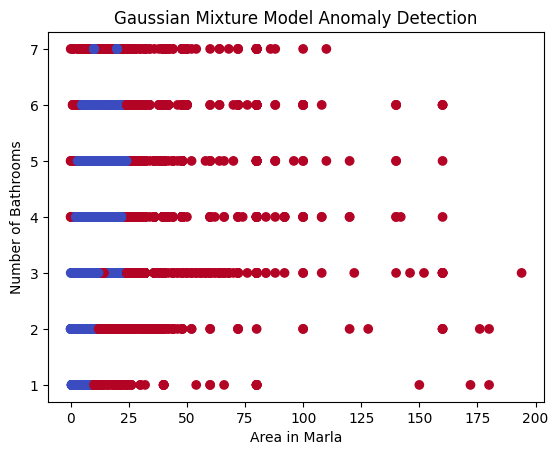

In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Обучение модели GMM
gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(df[['baths', 'Area_in_Marla']])
scores = gmm.score_samples(df[['baths', 'Area_in_Marla']])
threshold = np.percentile(scores, 5)  # Аномалии в 5% самых низких оценок
df['anomaly'] = scores < threshold

# Визуализация аномалий
plt.scatter(df['Area_in_Marla'], df['baths'], c=df['anomaly'], cmap='coolwarm')
plt.xlabel('Area in Marla')
plt.ylabel('Number of Bathrooms')
plt.title('Gaussian Mixture Model Anomaly Detection')
plt.show()


## Задание 7. Обнаружение аномалий в распределении спален с использованием DBSCAN
Примените DBSCAN для обнаружения аномальных значений в количестве спален в зависимости от цены недвижимости.
Настройте параметры eps и min_samples для эффективного обнаружения аномалий.
Визуализируйте нормальные и аномальные объекты на диаграмме рассеяния, где цвет точек отражает их статус (аномалия или нет).

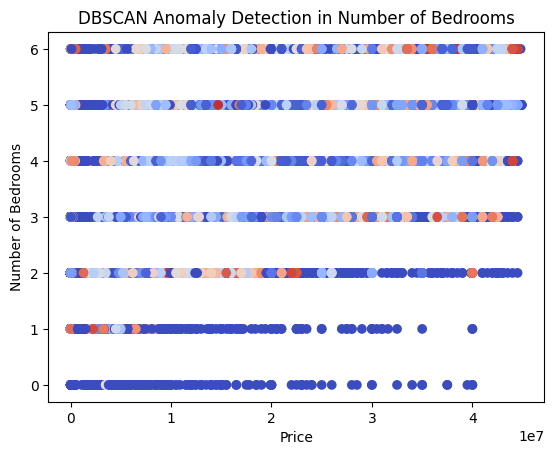

In [ ]:
from sklearn.cluster import DBSCAN
import pandas as pd
import matplotlib.pyplot as plt

# Обучение модели DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
df['anomaly'] = dbscan.fit_predict(df[['bedrooms', 'price']])

# Визуализация аномалий
plt.scatter(df['price'], df['bedrooms'], c=df['anomaly'], cmap='coolwarm')
plt.xlabel('Price')
plt.ylabel('Number of Bedrooms')
plt.title('DBSCAN Anomaly Detection in Number of Bedrooms')
plt.show()
